In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import logging

In [4]:
import logging  
import logging.handlers  
  
LOG_FILE = 'tst.log'  
  
handler = logging.handlers.RotatingFileHandler(LOG_FILE, maxBytes = 1024*1024, backupCount = 5) # 实例化handler   
fmt = '%(asctime)s - %(filename)s:%(lineno)s - %(name)s - %(message)s'  
  
formatter = logging.Formatter(fmt)   # 实例化formatter  
handler.setFormatter(formatter)      # 为handler添加formatter  
  
logger = logging.getLogger('tst')    # 获取名为tst的logger  
logger.addHandler(handler)           # 为logger添加handler  
logger.setLevel(logging.DEBUG)  
  
logger.info('first info message')  
logger.debug('first debug message')  

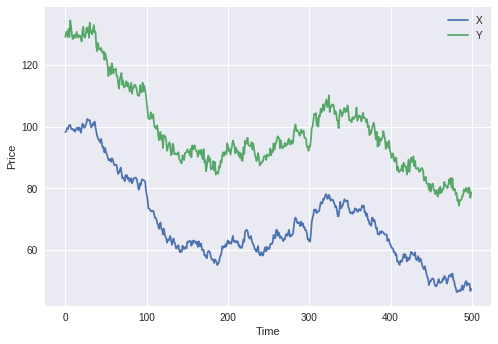

In [5]:
np.random.seed(100)
mu,sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 500)
y = np.random.normal(mu, sigma, 500)
X = pd.Series(np.cumsum(x)) + 100
Y = X + y + 30
# add trend item for X and Y
for i in range(500):
    X[i] = X[i] - i/10
    Y[i] = Y[i] - i/10
plt.plot(X); 
plt.plot(Y);
plt.xlabel("Time"); plt.ylabel("Price");
plt.legend(["X", "Y"]);
plt.show()

500

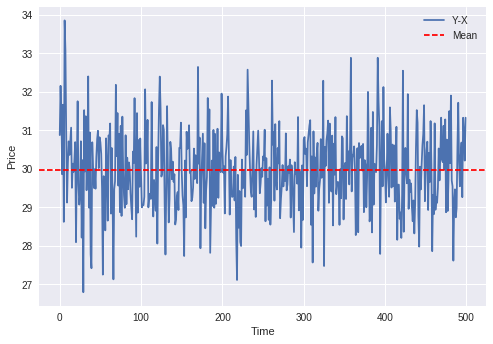

In [6]:
plt.plot(Y-X);
plt.axhline((Y-X).mean(), color="red", linestyle="--");
plt.xlabel("Time"); plt.ylabel("Price");
plt.legend(["Y-X", "Mean"]);

X.shape[0]

In [10]:
# calculate z-score
# account for transaction fee
def zscore(series):
    return (series - series.mean()) / np.std(series)

#print mean(Y-X)
print ((Y-X).mean())

def bit_score(series1, series2, fee1=0.003, fee2=0.003, min_profit=0.1):
    series = series1 - series2
    mu = series.mean()
    sigma = np.std(series)
    cur_series  = series.iloc[series.shape[0]-1]
    cur_series1 = series1.iloc[series1.shape[0]-1]
    cur_series2 = series2.iloc[series2.shape[0]-1]
    mu_mid = (series1.mean() + series2.mean())/2
    z_score = (cur_series-mu) / sigma
    margin1 = abs(mu_mid - cur_series1*(1+fee1)) - min_profit
    margin2 = abs(mu_mid - cur_series2*(1+fee2)) - min_profit
    #debug usage
    dbg_templet = "p1:%f, p2:%f, mu:%f, sigma:%f, z_score:%f, margin1:%f, margin2:%f"
    dbg_tuple = (series1.iloc[series1.shape[0]-1],series2.iloc[series2.shape[0]-1], mu, sigma, z_score, margin1, margin2)
    logger.debug(("bit_score: " + dbg_templet)%dbg_tuple)
    #log
    if z_score > 1 and margin2 > 0:
        #log
        logger.debug("=================BUY2")
        return "buy2"
    if z_score < -1 and margin1 > 0:
        #log
        logger.debug("=================BUY1")
        return "buy1"
        
a=bit_score(X,Y)
print(a)
    
#print (Y-X)[-1]

29.971873859062978
buy1


In [11]:
#i=2
#X_slice = X.iloc[(i-1)*5:i*5]
#Y_slice = Y.iloc[(i-1)*5:i*5]
##print (Y_slice)
#a=bit_score(X_slice,Y_slice)
for i in range(1,100):
    X_slice = X.iloc[(i-1)*5:i*5]
    Y_slice = Y.iloc[(i-1)*5:i*5]
    a=bit_score(X_slice,Y_slice,0.003,0.003,0.001)
    #print (a)

In [88]:
s=pd.Series([5,6,7,8])
#s[2:3]
i=1
s_slice = s.iloc[i*1:i*1+2]
s_slice

1    6
2    7
dtype: int64

In [ ]:
class my_account(object):
    """This is my_account"""
    def __init__(self, RMB, BitCoin, Fee):
        self.RMB = RMB
        self.BitCoin = BitCoin
        self.Fee = Fee
        self.state = "even"
        self.BuyPrice = 8000
    def order_taget(RMB, BitCoin):
        self.RMB += RMB
        self.BitCoin += BitCoin

In [ ]:
## -------------------------------------
## output states: 
##     buy1,buy2,side1,side2
##     sell1,sell2
##     price1, price2
##     abort
## -------------------------------------
def get_signal():
    z_score = z_test()
    if z_score > 1:
        return('buy1')
    if z_score < -1:
        return('buy2')
    if -1 <= z_score <= 1:
        if z_score >= 0:
            return('side1')
        else:
            return('side2')
        
def change_positions(new_state):
    if new_state == 'buy1':
        pass
        # send command to buy 1
        # detect feedback
        # if everything is OK, update my_account
        # else, raise EXCEPTION
    if new_state == 'buy2':
        pass
        # send command to buy 2
        # detect feedback
        # if everything is OK, update my_account
        # else, raise EXCEPTION

In [ ]:
def Initialization():
    pass

if __name__ == "__main__":
    """This is main"""
    Initialization()
    while True:
        pass
        # Get data，xiaoHe
        # Update repository, xiaoHe
        # Cal oppotunity, zhangLiang
        # Excute the decision, hanXin
        
        